In [15]:
import pandas as pd

# Load dataset
df = pd.read_csv("Crop Yiled with Soil and Weather.csv")

# Rename columns for consistency
df.rename(columns={'temp': 'Temp', 'yeild': 'Yield'}, inplace=True)

# Remove duplicates
df.drop_duplicates(inplace=True)

# Save cleaned dataset
df.to_csv("cleaned_crop_data.csv", index=False)
print("✅ Basic Cleaning Done! Saved as cleaned_crop_data.csv")


✅ Basic Cleaning Done! Saved as cleaned_crop_data.csv


In [17]:
# Load cleaned dataset
df = pd.read_csv("cleaned_crop_data.csv")

# Features and Target
X = df[['Fertilizer', 'Temp', 'N', 'P', 'K']]
y = df['Yield']

print("Feature Sample:\n", X.head())
print("\nTarget Sample:\n", y.head())



Feature Sample:
    Fertilizer  Temp     N     P     K
0        80.0  28.0  80.0  24.0  20.0
1        77.0  27.0  78.0  23.0  20.0
2        80.0  26.0  80.0  24.0  20.0
3        78.0  27.0  78.0  23.0  19.0
4        75.0  26.0  75.0  22.0  19.0

Target Sample:
 0    12.0
1    12.0
2    12.0
3    12.0
4    12.0
Name: Yield, dtype: float64


In [19]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

print("Scaled Features (first 5 rows):\n", X_scaled[:5])



Scaled Features (first 5 rows):
 [[ 1.3875238  -1.09082698  1.54089558  1.67118928  1.13166179]
 [ 1.07951284 -1.27709884  1.24679627  1.1637588   1.13166179]
 [ 1.3875238  -1.46337071  1.54089558  1.67118928  1.13166179]
 [ 1.18218316 -1.27709884  1.24679627  1.1637588   0.61635745]
 [ 0.87417219 -1.46337071  0.8056473   0.65632832  0.61635745]]


In [5]:
import pandas as pd

# Load cleaned dataset
df = pd.read_csv("cleaned_crop_data.csv")

# Quick check
print(df.head())


   Fertilizer  Temp     N     P     K  Yield
0        80.0  28.0  80.0  24.0  20.0   12.0
1        77.0  27.0  78.0  23.0  20.0   12.0
2        80.0  26.0  80.0  24.0  20.0   12.0
3        78.0  27.0  78.0  23.0  19.0   12.0
4        75.0  26.0  75.0  22.0  19.0   12.0


        Fertilizer         Temp            N            P            K  \
count  2585.000000  2585.000000  2585.000000  2585.000000  2585.000000   
mean     66.485639    33.856102    69.521257    20.706565    17.803896   
std       9.741797     5.369536     6.801740     1.971095     1.940976   
min      49.751436    23.771310    58.839466    17.723223    14.704883   
25%      59.865852    28.000000    64.834167    18.988292    15.975663   
50%      65.011418    36.965200    69.893160    20.888538    18.060992   
75%      76.943058    38.929553    76.846945    22.123683    19.133665   
max      80.223893    40.272480    80.218705    25.162178    22.064666   

             Yield  
count  2585.000000  
mean      8.529914  
std       1.938316  
min       5.150745  
25%       6.926678  
50%       8.500000  
75%      10.045096  
max      12.337651  


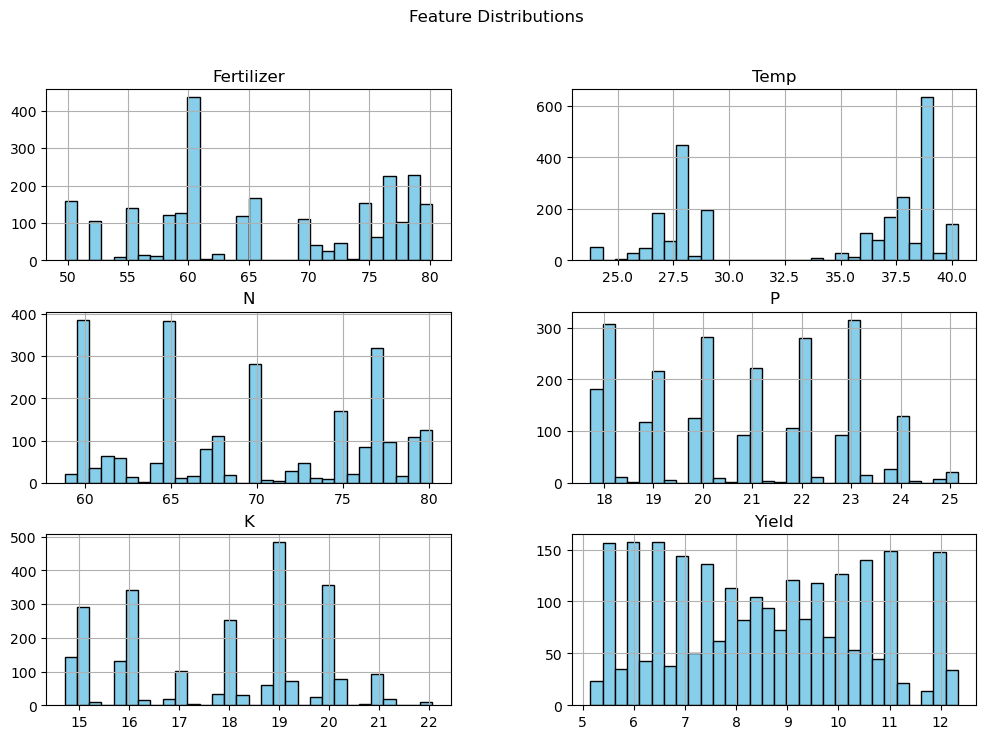

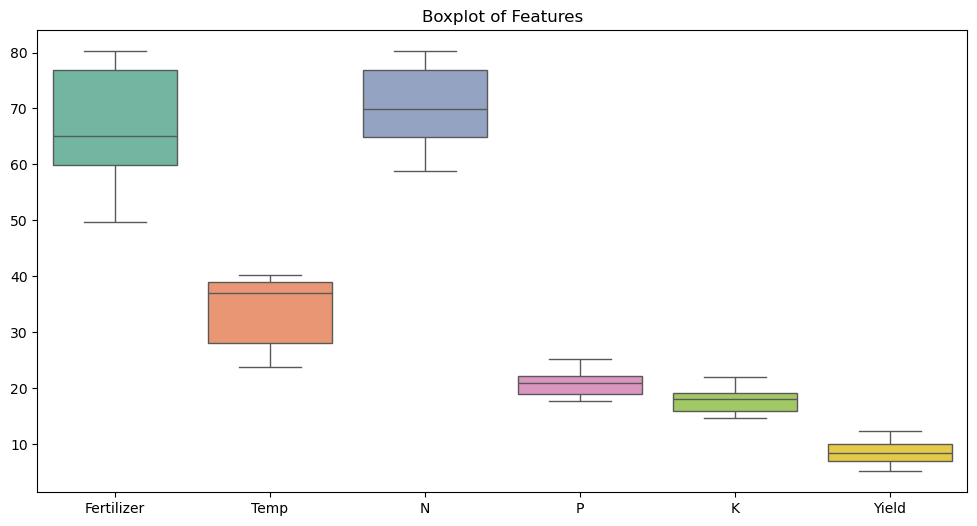

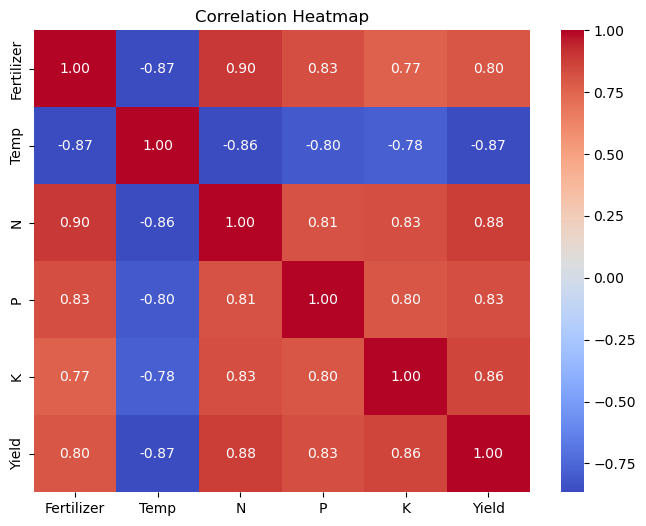

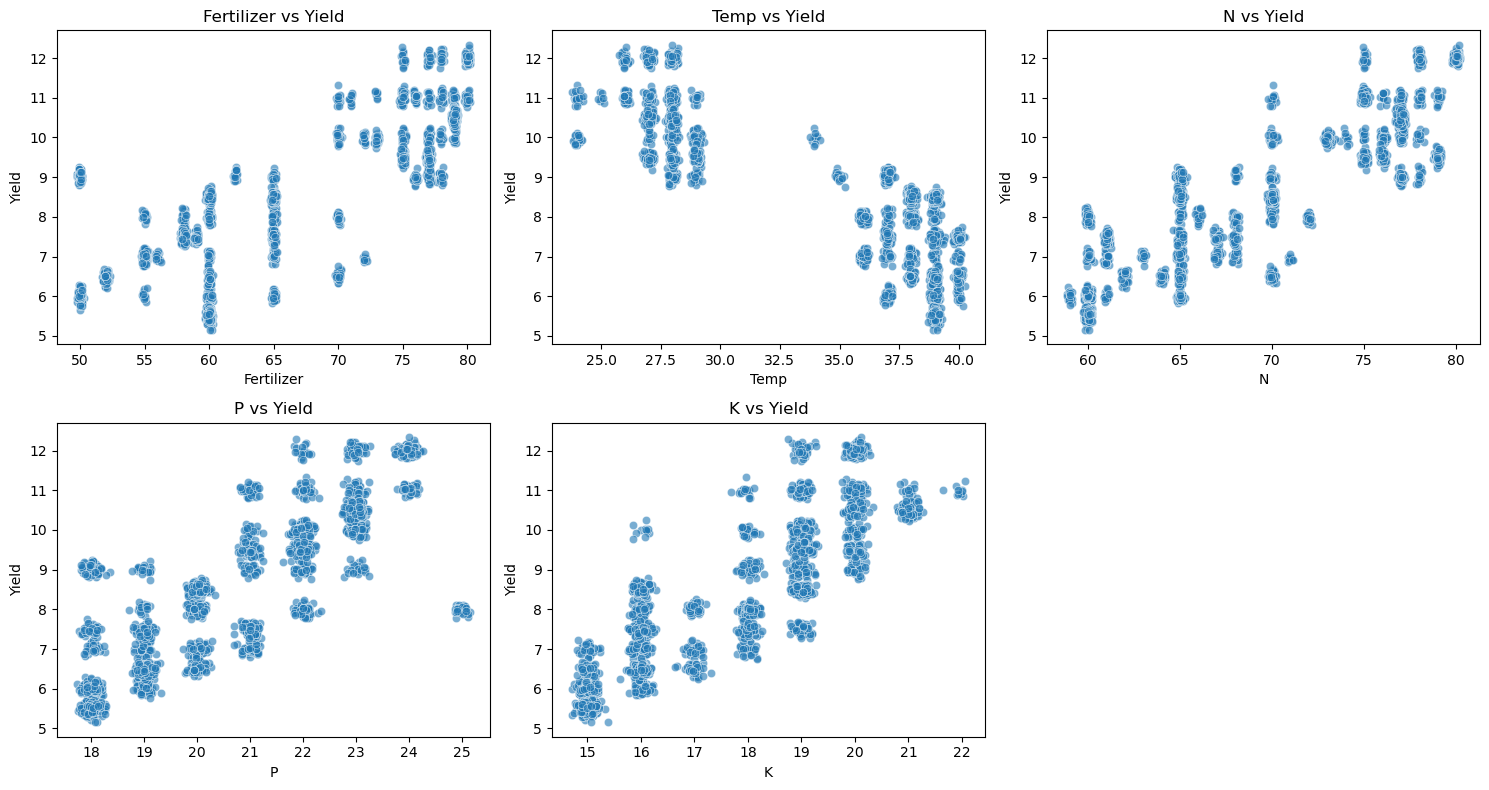

In [7]:
import matplotlib.pyplot as plt
import seaborn as sns

# Basic statistical summary
print(df.describe())

# Histogram for each feature
df.hist(bins=30, figsize=(12,8), color='skyblue', edgecolor='black')
plt.suptitle("Feature Distributions")
plt.show()

# Boxplots to check outliers
plt.figure(figsize=(12,6))
sns.boxplot(data=df, palette="Set2")
plt.title("Boxplot of Features")
plt.show()

# Correlation heatmap
plt.figure(figsize=(8,6))
sns.heatmap(df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Correlation Heatmap")
plt.show()

# Scatter plots - Yield vs other features
features = ['Fertilizer','Temp','N','P','K']
plt.figure(figsize=(15,8))
for i, col in enumerate(features, 1):
    plt.subplot(2,3,i)
    sns.scatterplot(x=df[col], y=df['Yield'], alpha=0.6)
    plt.title(f"{col} vs Yield")
plt.tight_layout()
plt.show()


In [9]:
# Correlation with target variable
correlation = df.corr()['Yield'].sort_values(ascending=False)
print("Correlation with Yield:\n", correlation)


Correlation with Yield:
 Yield         1.000000
N             0.877467
K             0.855114
P             0.831155
Fertilizer    0.797152
Temp         -0.865053
Name: Yield, dtype: float64


In [19]:
from sklearn.preprocessing import StandardScaler

# Define features and target
X = df[['Fertilizer','Temp','N','P','K']]
y = df['Yield']

# Scale the features
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)


C:\Users\Aarthy_JP\AppData\Local\Temp\ipykernel_13468\850233013.py:16: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")


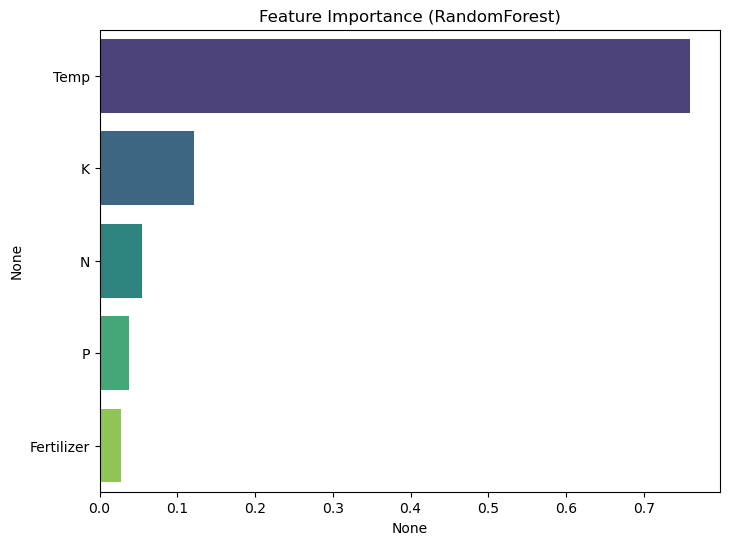

Feature Importance:
 Temp          0.759119
K             0.121051
N             0.054786
P             0.037359
Fertilizer    0.027686
dtype: float64


In [21]:
from sklearn.ensemble import RandomForestRegressor
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Train RandomForest
model = RandomForestRegressor(random_state=42)
model.fit(X_scaled, y)

# Feature importance
importances = model.feature_importances_
feature_importance = pd.Series(importances, index=X.columns).sort_values(ascending=False)

# Plot feature importance
plt.figure(figsize=(8,6))
sns.barplot(x=feature_importance, y=feature_importance.index, palette="viridis")
plt.title("Feature Importance (RandomForest)")
plt.show()

print("Feature Importance:\n", feature_importance)
